In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
hr_data= pd.read_csv('HRData.csv')
print(hr_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [44]:
print(hr_data.isnull().sum()) ##Since there are no null alues we dont have any NAN values to remove 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [45]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


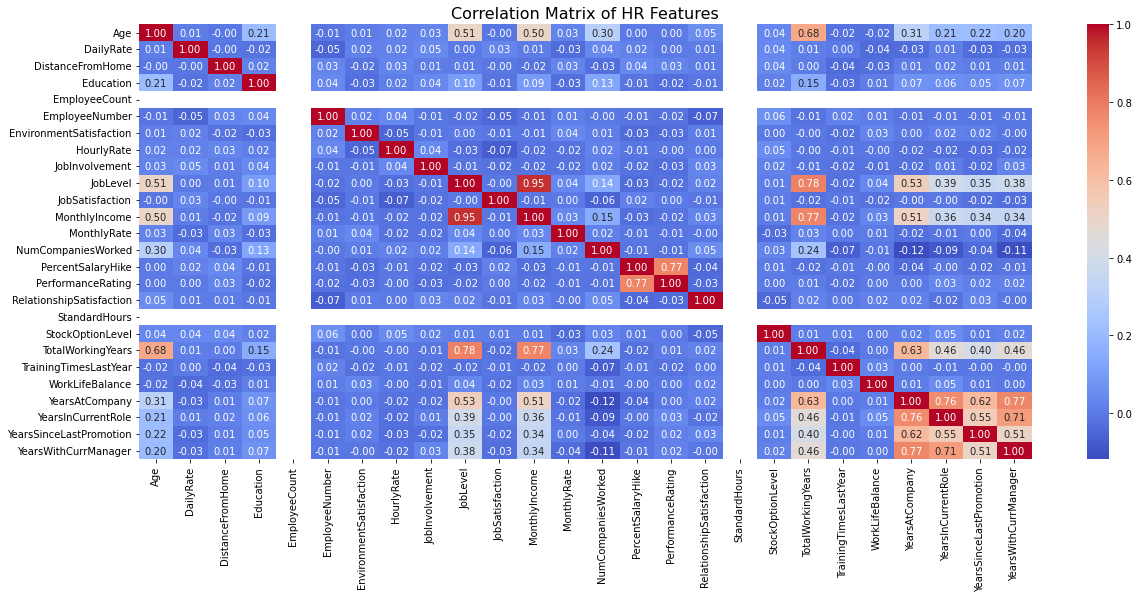

In [46]:
selected_columns=list(hr_data.columns)
corr_matrix = hr_data[selected_columns].corr()

# Set figure size for the heatmap
plt.figure(figsize=(20, 8))

# Create the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the heatmap
plt.title('Correlation Matrix of HR Features', fontsize=16)

# Show the plot
plt.show()

In [47]:
#From the above correlation matrix for all numeric values we can keep those table columns which will be important for us and drop others;among objective details I dropped over 18 column because we already know the age of the person so that is unnecessary since we know who will be over 18
hr_data_new=hr_data.drop(["DailyRate","DistanceFromHome","Education","EmployeeCount","EnvironmentSatisfaction","HourlyRate","JobInvolvement","MonthlyRate","RelationshipSatisfaction","StandardHours","StockOptionLevel","Over18","TrainingTimesLastYear","WorkLifeBalance"],axis=1)

In [48]:
hr_data_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EmployeeNumber', 'Gender', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [51]:
hr_data_new.columns=["Age of Employee","Employee Attrition Needed","Business Travel", "Dept","Education Degree", "Emp. No.", "Gender","Job Level","Role","Job Satisfaction Rate","Marital Status","Income per month","No. of Companies Worked","Over Time","Salary Growth Rate","Performance Rate","Employment Span","Years At Company","Years In Current Position","Years Since Last Promotion","Duration with Current Manager"]
                    
                    
                     
                    
                    
                     
                     
                     
                     

In [58]:
##We will check if there are any duplicates on the basis of Emp. No. to check if there are any double entries of any employee; From the result it is clear that we dont have any duplicate entries
duplicates_in_one_column = len(hr_data_new['Emp. No.']) - len(hr_data_new['Emp. No.'].drop_duplicates())
print(f"Number of duplicates on the basis of Emp. No. column: {duplicates_in_one_column}")

Number of duplicates on the basis of Emp. No. column: 0


In [59]:
hr_data_new.head()

,Age of Employee,Employee Attrition Needed,Business Travel,Dept,Education Degree,Emp. No.,Gender,Job Level,Role,Job Satisfaction Rate,...,Income per month,No. of Companies Worked,Over Time,Salary Growth Rate,Performance Rate,Employment Span,Years At Company,Years In Current Position,Years Since Last Promotion,Duration with Current Manager
0,41,Yes,Travel_Rarely,Sales,Life Sciences,1,Female,2,Sales Executive,4,...,5993,8,Yes,11,3,8,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,Life Sciences,2,Male,2,Research Scientist,2,...,5130,1,No,23,4,10,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,Other,4,Male,1,Laboratory Technician,3,...,2090,6,Yes,15,3,7,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,Life Sciences,5,Female,1,Research Scientist,3,...,2909,1,Yes,11,3,8,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,Medical,7,Male,1,Laboratory Technician,2,...,3468,9,No,12,3,6,2,2,2,2
